In [1]:
#import modules
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
from keras.layers import Dropout, Activation, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tqdm

In [2]:
df = pd.read_csv("Altus_nextevent.csv")
df_original = df

In [3]:
print(df.head())

  Events
0   Rain
1   Rain
2   Rain
3   Rain
4   Rain


In [4]:
df.shape

(3047, 1)

In [5]:
df['Events'].nunique()

6

In [6]:
df['Events'].unique()

array(['Rain', 'Fog', 'Cold', 'Snow', 'Storm', 'Precipitation'],
      dtype=object)

In [7]:
df['Events'].value_counts()

Rain             1488
Fog              1405
Snow               61
Storm              37
Cold               31
Precipitation      25
Name: Events, dtype: int64

In [8]:
import seaborn as sns

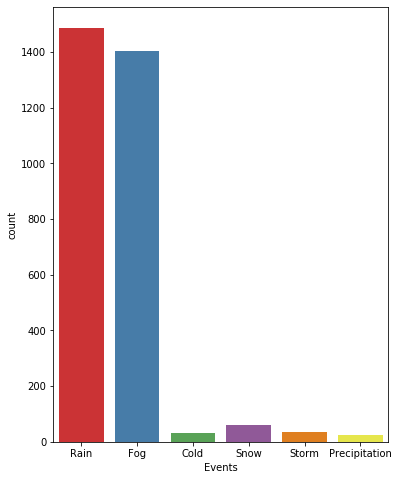

In [9]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Events", data=df, palette="Set1")
plt.show()

In [10]:
df['Events'] = df['Events'].map({"Rain":0, "Fog":1, "Cold":2, "Snow":3, "Storm":4, "Precipitation":5})

In [11]:
col = ["Events"]

In [12]:
data = df.loc[:, col].values

In [13]:
np.unique(data)

array([0, 1, 2, 3, 4, 5])

In [14]:
data = to_categorical(data)

In [15]:
data[1]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
df_train, df_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)

In [17]:
len(df_train), len(df_test)

(2437, 610)

In [18]:
df_train.shape

(2437, 6)

In [19]:
df_train[1:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
from tqdm import tqdm_notebook

In [54]:
def timeseries(arr, time_steps):
    input_size_0 = arr.shape[0] - time_steps
    input_size_1 = arr.shape[1]
    X = np.zeros((input_size_0, time_steps, input_size_1))
    Y = np.zeros((input_size_0, input_size_1))
    
    for i in tqdm_notebook(range(input_size_0)):
        X[i] = arr[i:time_steps+i]
        Y[i] = arr[time_steps+i]
    print("length of time-series i/o",X.shape,Y.shape)
    return X, Y
    

In [55]:
df_train[5:20]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [56]:
X_Train, Y_Train = timeseries(df_train, 20)
X_test, Y_test = timeseries(df_test, 20)

/home/bidur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



length of time-series i/o (2417, 20, 6) (2417, 6)



length of time-series i/o (590, 20, 6) (590, 6)


In [57]:
X_Train.shape[2], Y_Train.shape

(6, (2417, 6))

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, 
               input_shape=(X_Train.shape[1],X_Train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))

model.add(Dense(X_Train.shape[2], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 50)            11400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 126       
Total params: 32,746
Trainable params: 32,746
Non-trainable params: 0
__________________________________________________

In [60]:
history = model.fit(X_Train, Y_Train, epochs=10,
                   validation_data=(X_test, Y_test))

Epoch 1/10
76/76 [==============================] - 2s 20ms/step - loss: 0.6029 - accuracy: 0.7791 - val_loss: 0.9479 - val_accuracy: 0.7119
Epoch 2/10
76/76 [==============================] - 1s 14ms/step - loss: 0.5991 - accuracy: 0.7782 - val_loss: 0.9535 - val_accuracy: 0.7169
Epoch 3/10
76/76 [==============================] - 1s 14ms/step - loss: 0.5944 - accuracy: 0.7741 - val_loss: 0.9398 - val_accuracy: 0.7169
Epoch 4/10
76/76 [==============================] - 1s 13ms/step - loss: 0.6012 - accuracy: 0.7716 - val_loss: 0.9430 - val_accuracy: 0.7169
Epoch 5/10
76/76 [==============================] - 1s 14ms/step - loss: 0.5947 - accuracy: 0.7729 - val_loss: 0.9372 - val_accuracy: 0.7153
Epoch 6/10
76/76 [==============================] - 1s 13ms/step - loss: 0.5877 - accuracy: 0.7803 - val_loss: 0.9246 - val_accuracy: 0.7102
Epoch 7/10
76/76 [==============================] - 1s 14ms/step - loss: 0.5890 - accuracy: 0.7807 - val_loss: 0.9628 - val_accuracy: 0.7186
Epoch 8/10
76

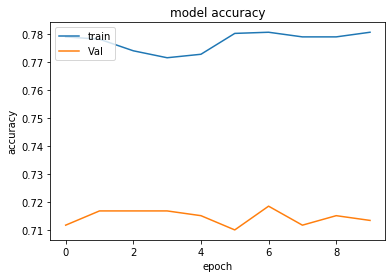

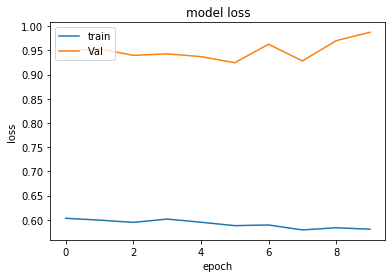

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
